# Import TensorFlow

In [1]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.3.0


# Importing Dataset

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Shapes of Imported Arrays

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Plot an Image Example

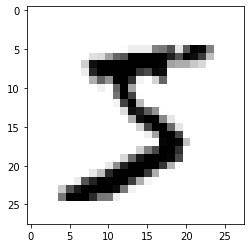

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0],cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[0]

5

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Display Pixel Values

In [7]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Data Normalization

In [16]:
X_train_norm = X_train/255
X_test_norm = X_test/255

### Display Normalized Pixel Values

In [10]:
np.unique(X_train_norm)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

# Creating a Model


In [11]:
from tensorflow import keras

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

# Compiling the Model

In [12]:
model.compile( optimizer = 'rmsprop' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


# Training the Model


In [13]:
model.fit(X_train_norm,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9261
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1138 - accuracy: 0.9662
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9751


### Evaluating the Model

In [17]:
model.evaluate(X_test_norm,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9744


[0.09762807190418243, 0.974399983882904]

### Plotting the Results

In [33]:
y_pred_coded = model.predict(X_test)

In [34]:
def true_value(arr):
  count=0
  for i in arr:
    if i==1:
      return count
    else:
      count+=1

y_pred = []
for i in y_pred_coded:
  y_pred += [true_value(i)]

len(y_pred)

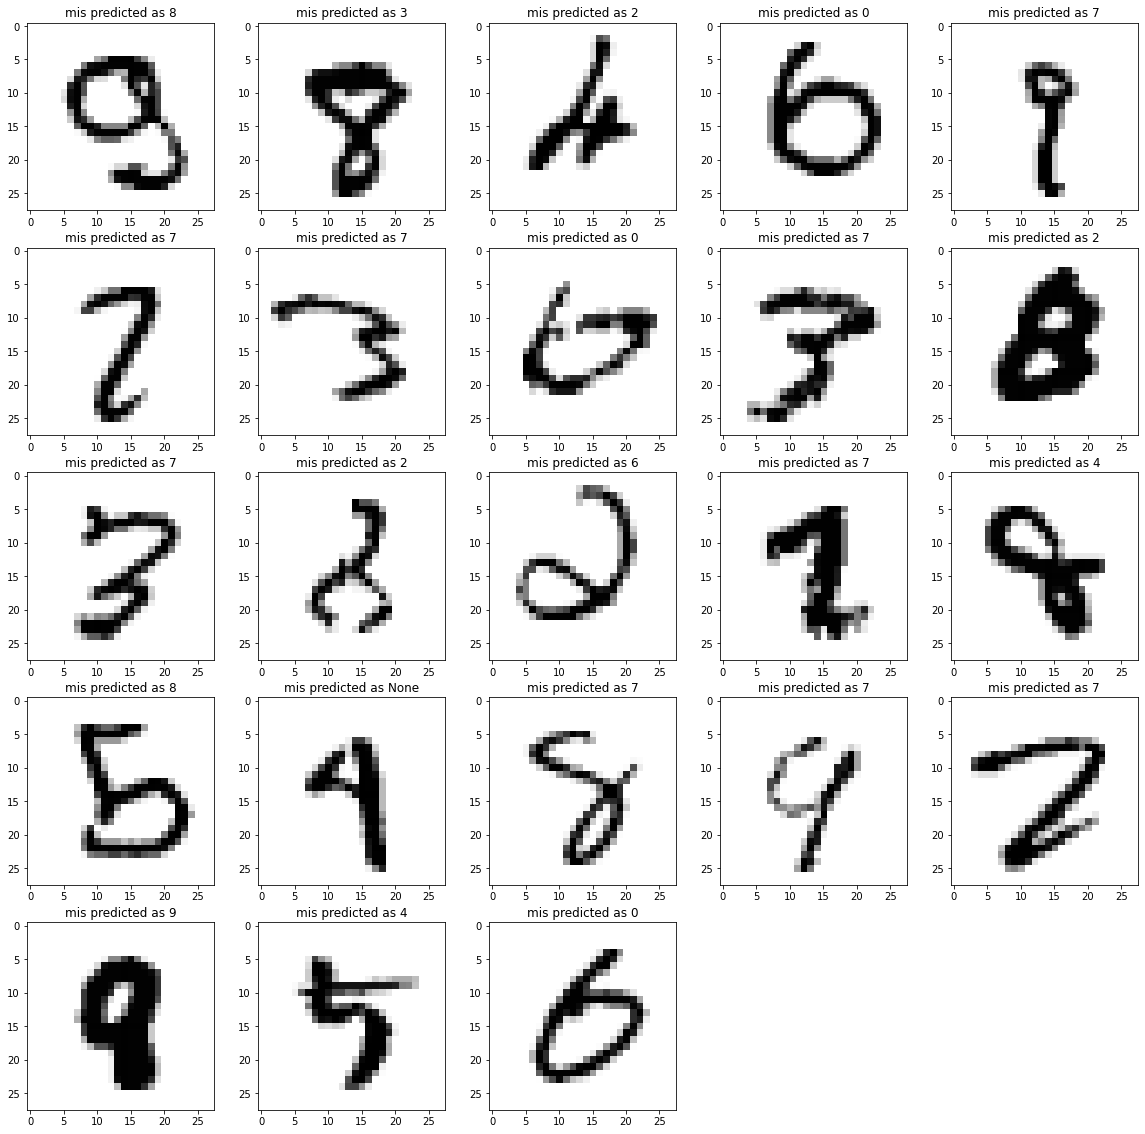

In [50]:
iter = 1
figure = plt.figure(figsize=(20,20))
for i in range(1000):
  if y_pred[i] != y_test[i]:
    figure.add_subplot(5,5,iter)
    plt.imshow(X_test[i],cmap='binary')
    plt.title('mis predicted as {}'.format(y_pred[i]))
    iter+=1
  elif iter==26:
    break
  else:
    pass
plt.show()  